## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mousemetadata_df = pd.read_csv(mouse_metadata_path)
studyresults_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddata_df = pd.merge(mousemetadata_df, studyresults_df, how = "outer", on = "Mouse ID")

# Display the data table for preview
combineddata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
numbermice = len(combineddata_df['Mouse ID'])

numbermice

1893

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
micebyid_df = combineddata_df[combineddata_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

micebyid_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
mousebyid_df = combineddata_df.loc[combineddata_df["Mouse ID"] == "g989"]

mousebyid_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropduplicatemouse_df = combineddata_df.drop_duplicates(subset="Mouse ID")
dropduplicatemouse_df = dropduplicatemouse_df.reset_index()

dropduplicatemouse_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.0,0
1,10,s185,Capomulin,Female,3,17,0,45.0,0
2,20,x401,Capomulin,Female,16,15,0,45.0,0
3,30,m601,Capomulin,Male,22,17,0,45.0,0
4,40,g791,Ramicane,Male,11,16,0,45.0,0


In [56]:
# Checking the number of mice in the clean DataFrame.
numbermice = len(dropduplicatemouse_df['Mouse ID'].unique())

numbermice

249

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by drug regimen
groupsummarystats = combineddata_df.groupby('Drug Regimen')

# Mean
meantumorvolume = groupsummarystats['Tumor Volume (mm3)'].mean()

# Median
mediantumorvolume = groupsummarystats['Tumor Volume (mm3)'].median()

# Variance(numpy doesn't work on groupby)
variancetumorvolume = groupsummarystats['Tumor Volume (mm3)'].var()

# Standard deviation
stddevtumor = groupsummarystats['Tumor Volume (mm3)'].std()

# Sem
semtumor = groupsummarystats['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Summary data frame
summarytumorvolume_df = pd.DataFrame({"Mean Tumor Volume": meantumorvolume,
                                      "Median Tumor Volume": mediantumorvolume,
                                      "Tumor Volume Variance": variancetumorvolume,
                                      "Tumor Volume Std. Dev.":stddevtumor,
                                      "Tumor Volume Std. Err.":semtumor})

summarytumorvolume_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregationtumor_df = groupsummarystats.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

# Rename columns
aggregationtumor_df = aggregationtumor_df.rename(columns = {'mean':'Mean', 'median':'Median',
                                                              'var':'Variance', 'std':'Std. Dev.', 'sem':'SEM'})

aggregationtumor_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

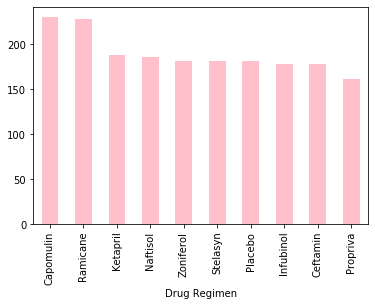

In [88]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Calculate the total number of measurements
numbermeasurementsregimen = groupsummarystats['Tumor Volume (mm3)'].count()

# Sort into descending order
numbermeasurementsregimensorted = numbermeasurementsregimen.sort_values(ascending = False)

# Plot using pandas
numbermeasurementsregimensorted.plot(kind = 'bar', facecolor = 'pink')

# Add labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

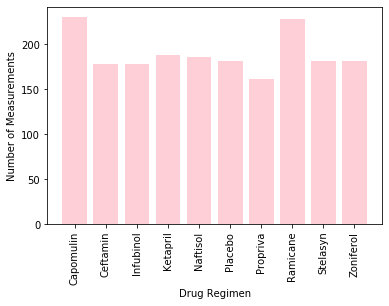

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Plot using pyplot
plt.bar(numbermeasurementsregimen.index.values, numbermeasurementsregimen.values, facecolor="pink", alpha=0.75, align="center")

# Add labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Format x axis headers
plt.xticks(rotation = 90)

plt.show()

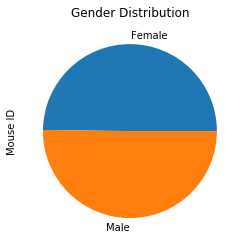

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
groupgender = dropduplicatemouse_df.groupby('Sex')

gendercount = groupgender['Mouse ID'].count()

gendercount.plot(kind = 'pie', y = 'Mouse ID', title = 'Gender Distribution')

#bike_pie = just_one_bike.plot(kind="pie", y='tripduration', title=("Trips of " + bike_id))



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
